# load_hacc_gal_stellar_catalog

> Loading galaxy and star catalog

In [ ]:
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import numpy as np
import os
import matplotlib.pylab as plt

In [ ]:
#| export

def _convert_metallicity(hacc_metallicity, Z_solar):
    return hacc_metallicity/Z_solar

def _convert_age(hacc_age, H0):
    '''
    ## (hacc_age is in 1/H0 units)
    # H0 = (73 km/s/Mpc) x (1 Mpc/3.08 x 1019 km) = 2.37 x 10−18 1/s
    # https://www.e-education.psu.edu/astro801/content/l10_p5.html
    '''
    
    H0_per_sec = H0*(1/(3.08*1e19)) #seconds
    one_over_H0 = 1/H0_per_sec/(3.1536*1e16)
    age_hydro_gyr = hacc_age*one_over_H0
    
    return age_hydro_gyr

In [ ]:
#| export

def load_fsps_spectral_library(fileIn = '/lcrc/project/cosmo_ai/nramachandra/Projects/Hydro_paint/Data/fromLJ/Gals_Z0.txt'
                              ): 
    gal_tag, stellar_idx, metal, mass, age, x, y, z = np.loadtxt(fileIn, 
                                                                 skiprows=1, 
                                                                 unpack=True)
    Z_SOLAR_HACC = 0.012899
    Z_SOLAR_PADOVA = 0.019
    
    metal_z_solar = _convert_metallicity(metal, Z_SOLAR_PADOVA)
    
    H0 = 71.0
    age_gyr = _convert_age(age, H0)
    
    return gal_tag, stellar_idx, metal_z_solar, mass, age_gyr, x, y, z

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()

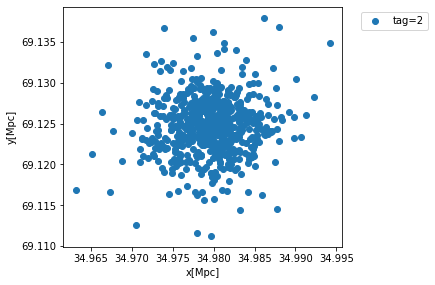

In [ ]:
#| hide

gal_tag, stellar_idx, metal, mass, age, x, y, z = load_fsps_spectral_library()

plt.figure(23, figsize =(5, 5))
# for gal_id in range(np.unique(gal_tag).shape[0]):
for gal_id in [2]:

    gal_tag_cond = np.where(gal_tag == np.unique(gal_tag)[gal_id])
    plt.scatter(x[gal_tag_cond], y[gal_tag_cond], label = 'tag=%d'%gal_id)
    
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('x[Mpc]')
plt.ylabel('y[Mpc]')
plt.show()

/home/nramachandra/anaconda3/envs/env_jax/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


<Figure size 720x720 with 0 Axes>

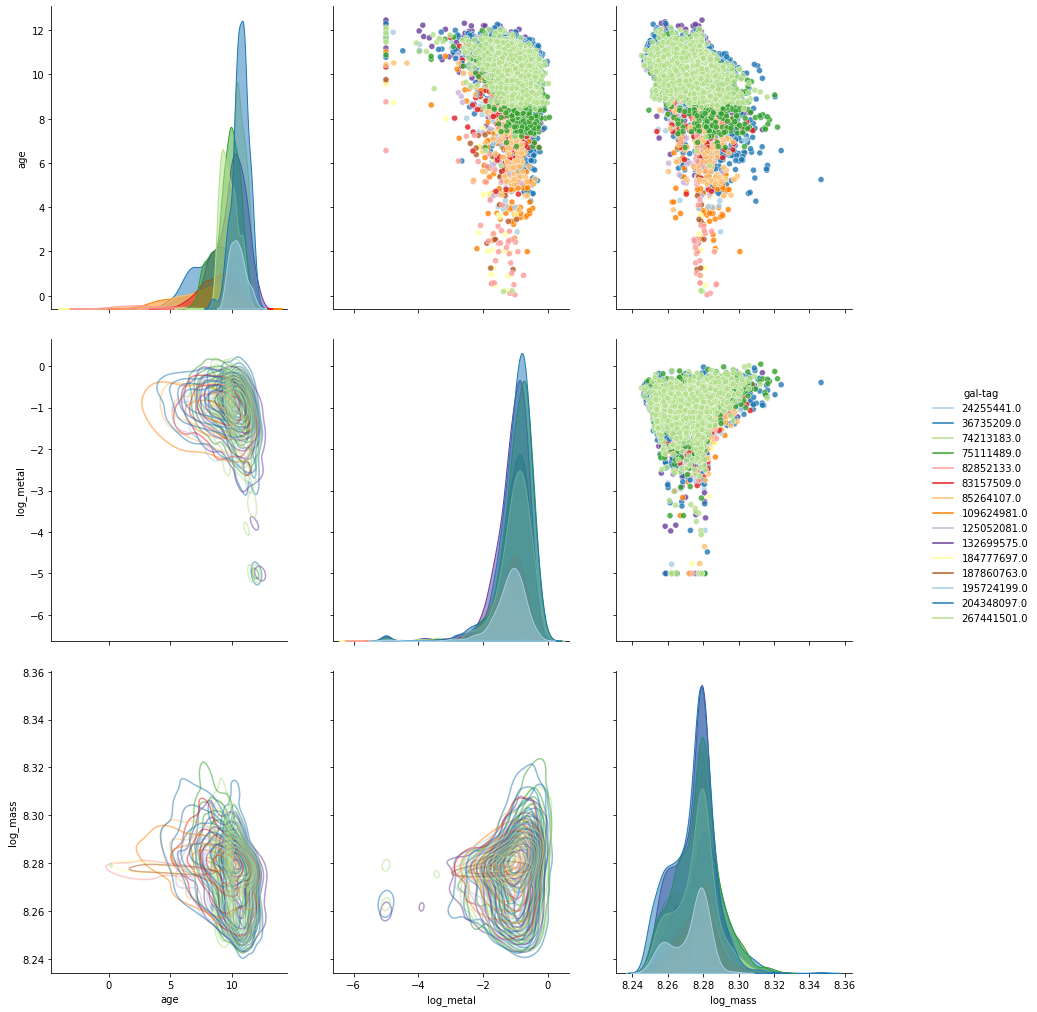

In [ ]:
#| hide 

import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 10))

df = pd.DataFrame(np.array([gal_tag, age, np.log10(metal + 1e-5), np.log10(mass)]).T, columns=['gal-tag', 'age','log_metal','log_mass'])
df1 = pd.DataFrame(np.array([age[gal_tag_cond], np.log10(metal + 1e-10)[gal_tag_cond], np.log10(mass)[gal_tag_cond]]).T, columns=['age','log_metal','log_mass'])


df_all = pd.concat([df.assign(dataset='all'), df1.assign(dataset='tag-select')])


def scatter_subset(x, y, hue, mask, **kws):
    sns.scatterplot(x=x[mask], y=y[mask], hue=hue[mask], **kws)

g = sns.PairGrid(df, hue="gal-tag", palette = "Paired", diag_sharey=False)
# g.map_lower(scatter_subset, mask=df["gal-tag"] == np.unique(gal_tag)[0])
g.map_upper(scatter_subset, mask=df["gal-tag"] != 0, alpha=0.8)
g.map_lower(sns.kdeplot, alpha=0.5, levels=10, fill=False)
g.map_diag(sns.kdeplot, fill=True, legend=False, warn_singular=False, alpha=0.5)
g.add_legend()
g.fig.set_size_inches(15,15)